# Catboost

# Линейная регрессия

In [113]:
import numpy 
import random

train_x = numpy.arange(0,50,1) 
# генерация шума
noise = numpy.random.normal(0, 1, len(train_x)) #  μ = 0, σ = 2, size = length of x or y. Choose μ and σ wisely.
# добавления шума к произвольной функции
train_y = (0.3*train_x + 0.5) + noise  

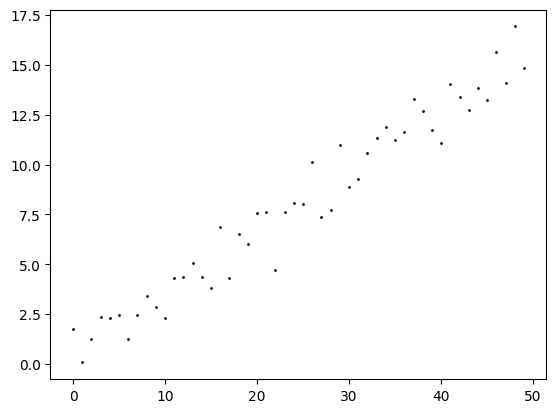

In [114]:
# график входных значений
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1)
axs.plot(train_x,train_y, 'o', color="black", markersize=1)
plt.show()
plt.close("all")

In [115]:
from catboost import CatBoostRegressor

# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=20,
                          learning_rate=1,
                          depth=2)
# Fit model
model.fit(train_x, train_y)
# Get predictions
test_x = numpy.expand_dims(numpy.arange(0,50,3) , axis=1)
pred_y = model.predict(test_x)

0:	learn: 2.2674061	total: 525us	remaining: 9.99ms
1:	learn: 1.4757282	total: 1.07ms	remaining: 9.64ms
2:	learn: 1.4309930	total: 1.23ms	remaining: 7ms
3:	learn: 1.2807857	total: 1.38ms	remaining: 5.52ms
4:	learn: 1.0986339	total: 1.51ms	remaining: 4.54ms
5:	learn: 1.0637919	total: 1.57ms	remaining: 3.66ms
6:	learn: 1.0450371	total: 1.61ms	remaining: 3ms
7:	learn: 1.0345404	total: 1.72ms	remaining: 2.57ms
8:	learn: 0.9811624	total: 1.76ms	remaining: 2.16ms
9:	learn: 0.9587189	total: 1.86ms	remaining: 1.86ms
10:	learn: 0.9405472	total: 1.91ms	remaining: 1.56ms
11:	learn: 0.9090118	total: 1.96ms	remaining: 1.3ms
12:	learn: 0.8905989	total: 2.29ms	remaining: 1.23ms
13:	learn: 0.8725770	total: 2.53ms	remaining: 1.09ms
14:	learn: 0.8504291	total: 2.59ms	remaining: 863us
15:	learn: 0.8354461	total: 2.64ms	remaining: 659us
16:	learn: 0.8118155	total: 2.69ms	remaining: 474us
17:	learn: 0.7958714	total: 2.73ms	remaining: 303us
18:	learn: 0.7697806	total: 2.78ms	remaining: 146us
19:	learn: 0.763

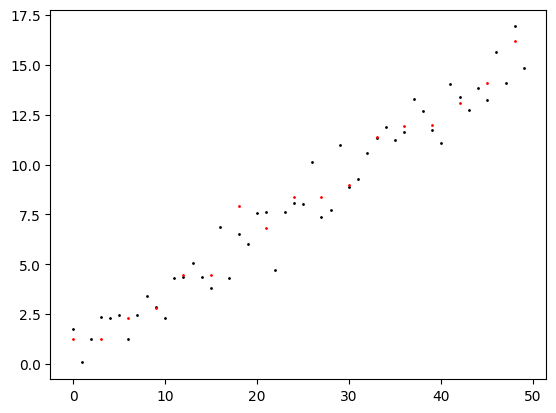

In [116]:
# график выходных значений
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1)
axs.plot(train_x,train_y, 'o', color="black", markersize=1)
axs.plot(test_x,pred_y, 'o', color="red", markersize=1)
plt.show()
plt.close("all")